# Scikit-Learn

In [1]:
import numpy as np
from sklearn import linear_model

In [2]:
import matplotlib.pyplot as plt

In [3]:
'''
Linear Regression
'''
x = np.array([0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]).reshape(-1, 1)

In [4]:
reg = linear_model.LinearRegression()
reg.fit(x, y)

LinearRegression()

In [5]:
'''
theta[1,0]
'''
reg.coef_

array([[0.67129519]])

In [6]:
'''
theta[0,0]
'''
reg.intercept_

array([0.65306531])

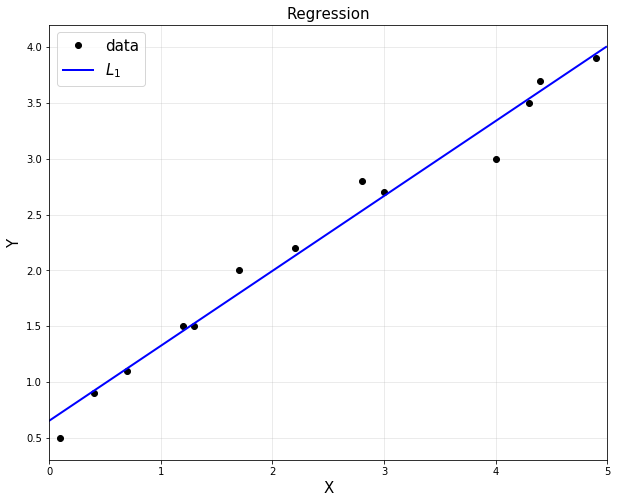

In [7]:
# to plot
plt.figure(figsize = (10, 8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = "data")

xp = np.arange(0, 5, 0.01).reshape(-1,1)

# to plot a straight line (fitted line)
yp1 = reg.intercept_ + reg.coef_*xp
plt.plot(xp, yp1, 'b', linewidth = 2, label = '$L_1$')
plt.legend(fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

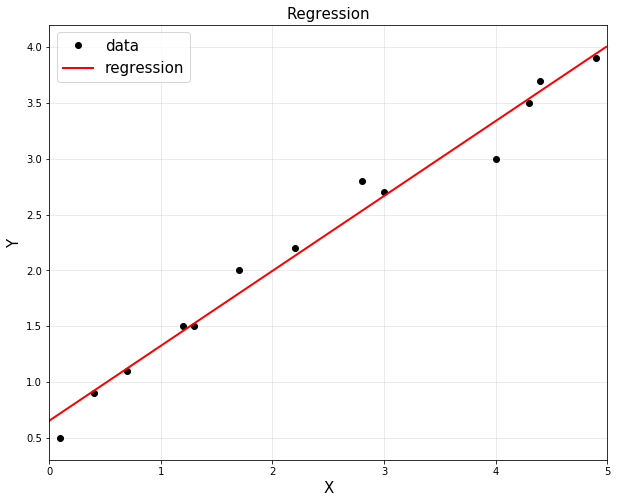

In [8]:
'''
reg.coef_, reg.intercept_를 이용해서 plot할 수도 있지만 reg.predict로 한번에...
'''
# to plot
plt.figure(figsize = (10, 8))
plt.title('Regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'ko', label = "data")

xp = np.arange(0, 5, 0.01).reshape(-1,1)

# to plot a straight line (fitted line)
plt.plot(xp, reg.predict(xp), 'r', linewidth = 2, label = "regression")
plt.legend(fontsize = 15)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.xlim([0, 5])
plt.show()

# Multivariate Linear Regression

In [9]:
# for 3D plot
from mpl_toolkits.mplot3d import Axes3D

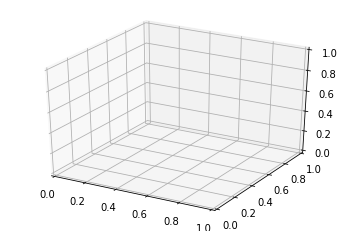

In [10]:
plt.subplot(1,1,1, projection='3d')
# plt.subplot에서 3차원 생성

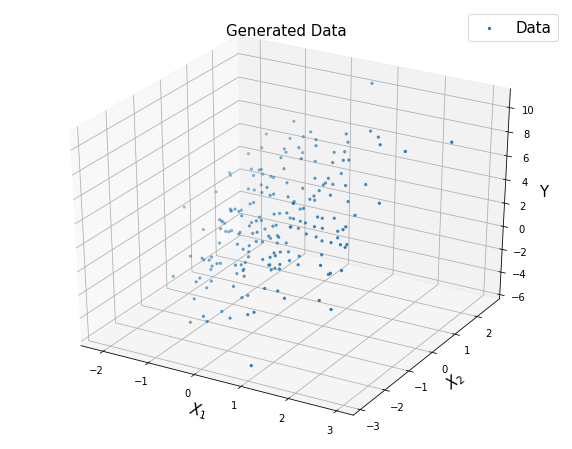

In [11]:
'''
y = theta0 + theta1*x1 + theta2*x2 + noise
다변수 일때 
feature가 늘어나도 hstack에서 1, x1, x2, xn개로 개수만 늘어나고 나머지는 같다고보면됨
'''

n = 200
x1 = np.random.randn(n, 1) # 가우시안 distribution(정규분포) 랜덤생성 (기본값 평균=0, 분산=1)
x2 = np.random.randn(n, 1)
noise = 0.5*np.random.randn(n, 1);

y = 2 + 1*x1 + 3*x2 + noise # 계수는 임의로 지정, noise 추가

fig = plt.figure(figsize = (10, 8)) # fig(그림판?) 생성
ax = fig.add_subplot(1, 1, 1, projection = '3d') # 3차원 3d 이미지 추가
ax.set_title('Generated Data', fontsize = 15)
ax.set_xlabel('$X_1$', fontsize = 15)
ax.set_ylabel('$X_2$', fontsize = 15)
ax.set_zlabel('Y', fontsize = 15)
ax.scatter(x1, x2, y, marker = '.', label = 'Data')
#ax.view_init(30,30) #각도에 따라 회전
plt.legend(fontsize = 15)
plt.show()

In [12]:
np.arange(np.min(x1), np.max(x1), 0.5) #  min에서 max까지 0.5간격으로 생성

array([-2.11842815, -1.61842815, -1.11842815, -0.61842815, -0.11842815,
        0.38157185,  0.88157185,  1.38157185,  1.88157185,  2.38157185,
        2.88157185])

In [13]:
np.arange(np.min(x1), np.max(x1), 0.5).shape

(11,)

In [14]:
np.arange(np.min(x2), np.max(x2), 0.5)

array([-2.87571191, -2.37571191, -1.87571191, -1.37571191, -0.87571191,
       -0.37571191,  0.12428809,  0.62428809,  1.12428809,  1.62428809,
        2.12428809,  2.62428809])

In [15]:
np.arange(np.min(x2), np.max(x2), 0.5).shape

(12,)

In [20]:
theta # 2, 1, 3에 가깝게 나옴

matrix([[1.99209355],
        [1.01706308],
        [2.9761212 ]])

(200, 3)


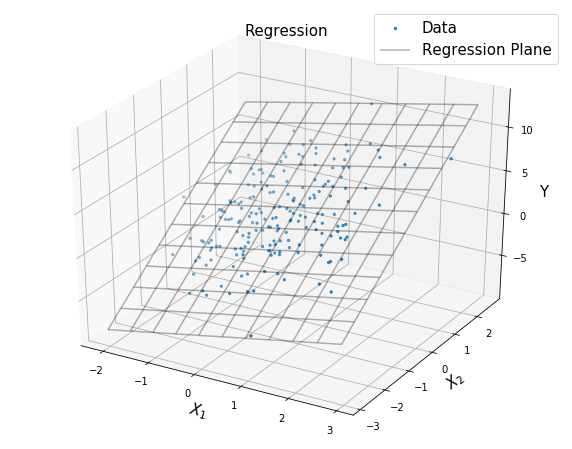

In [19]:
#% matplotlib qt5

A = np.hstack([np.ones((n,1)), x1, x2])
A = np.asmatrix(A)
theta = (A.T @ A).I @ A.T @ y

X1, X2 = np.meshgrid(np.arange(np.min(x1), np.max(x1), 0.5), 
                     np.arange(np.min(x2), np.max(x2), 0.5))
YP = theta[0,0] + theta[1,0]*X1 + theta[2,0]*X2

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.set_title('Regression', fontsize = 15)
ax.set_xlabel('$X_1$', fontsize = 15)
ax.set_ylabel('$X_2$', fontsize = 15)
ax.set_zlabel('Y', fontsize = 15)
ax.scatter(x1, x2, y, marker = '.', label = 'Data')
ax.plot_wireframe(X1, X2, YP, color = 'k', alpha = 0.3, label = 'Regression Plane')
#ax.view_init(30,30)
plt.legend(fontsize = 15)
plt.show()

# Nonlinear Regression

## Nonlinear Regression with Polynomial Features¶

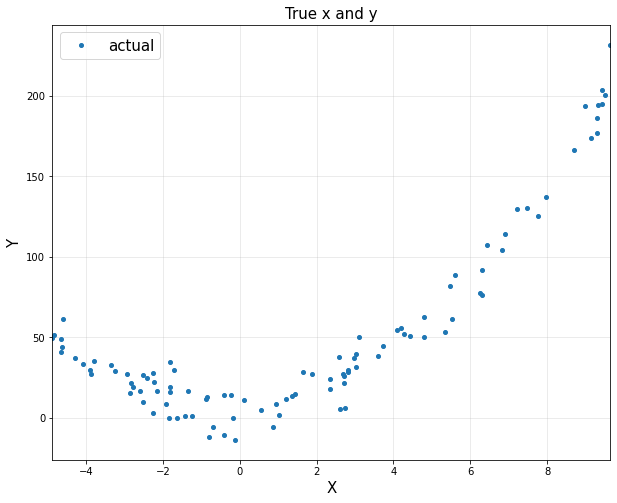

In [42]:
'''
y = theta0 + theta1*x + theta2*x^2 + noise
feature가 늘어나도 hstack에서 x**0, x**1, x**2, x**n개로 개수만 늘어나고 나머지는 같다고보면됨
'''
n = 100            
x = -5 + 15*np.random.rand(n, 1)
noise = 10*np.random.randn(n, 1)

y = 10 + 1*x + 2*x**2 + noise

plt.figure(figsize = (10, 8))
plt.title('True x and y', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.plot(x, y, 'o', markersize = 4, label = 'actual')
plt.xlim([np.min(x), np.max(x)])
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)
plt.show()

In [43]:
A = np.hstack([x**0, x, x**2])
A = np.asmatrix(A)

#theta = np.linalg.inv(A.T @ A) @ A.T @ y
theta = (A.T @ A).I @ A.T @ y
print('theta:\n', theta)

theta:
 [[7.07473754]
 [0.91769583]
 [2.04345955]]


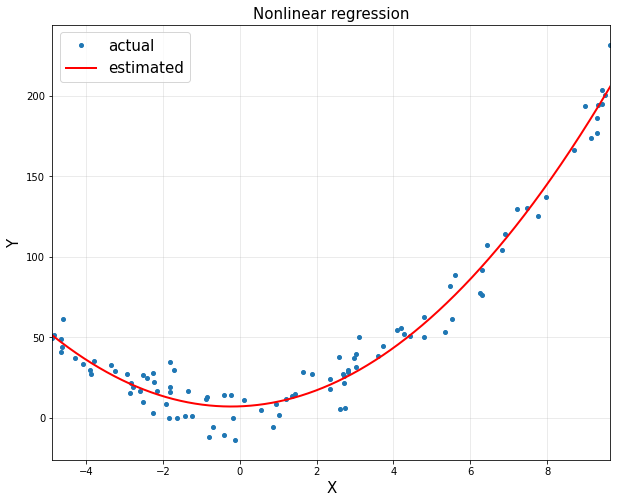

In [47]:
xp = np.arange(-5, 10, 0.01).reshape(-1,1)
yp = theta[0,0] + theta[1,0]*xp + theta[2,0]*xp**2

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', markersize = 4, label = 'actual')
plt.plot(xp, yp, 'r', linewidth = 2, label = 'estimated')

plt.title('Nonlinear regression', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.xlim([np.min(x), np.max(x)])
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)
plt.show()

# Linear Basis Function Models

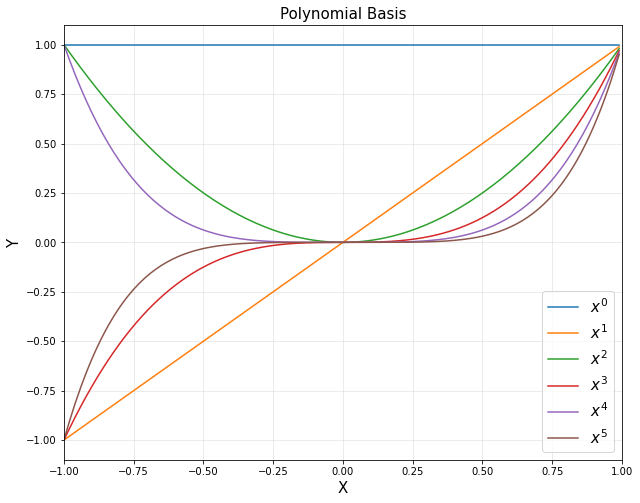

In [19]:
# feature [1, x(1), x(1)2, x(1)3, x(1)4 ... x(1)n ]  x1의 0승 1승 2승... n승
#         [1, x(2), x(2)2, x(2)3, x(2)4 ... x(2)n ]  x2의 0승 1승 2승... n승
#         [1, x(3), x(3)2, x(3)3, x(3)4 ... x(3)n ]
#         [.., ...,  ...,   ....,  .... ... ...   ]
#         [1, x(m), x(m)2, x(m)3, x(m)4 ... x(m)n ]

xp = np.arange(-1, 1, 0.01).reshape(-1, 1)
# polybasis = np.hstack([xp**0, xp**1, xp**2 ... , xp**5])
polybasis = np.hstack([xp**i for i in range(6)])

plt.figure(figsize = (10, 8))

for i in range(6):
    plt.plot(xp, polybasis[:,i], label = '$x^{}$'.format(i))
    
plt.title('Polynomial Basis', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-1, 1, -1.1, 1.1])
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)
plt.show()

In [51]:
# N, F -> N, axis한 축(차원)이 없어진다
np.linalg.norm(xp-u[0], 2, axis = 1)

array([ 4.  ,  3.99,  3.98, ..., 10.97, 10.98, 10.99])

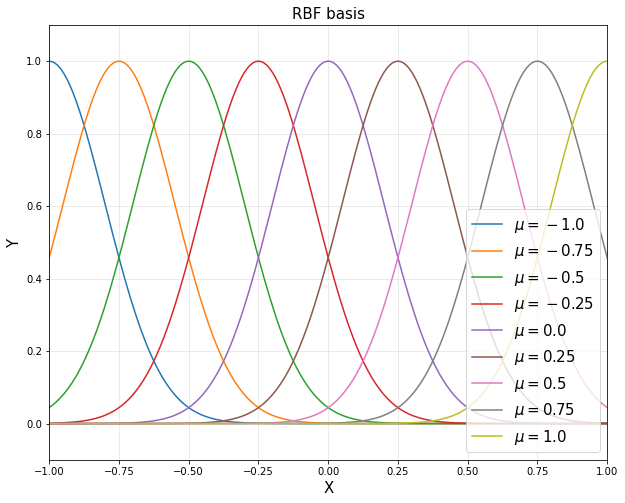

In [48]:
d = 9

u = np.linspace(-1, 1, d)
sigma = 0.2

rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

plt.figure(figsize = (10, 8))

for i in range(d):
    plt.plot(xp, rbfbasis[:,i], label='$\mu = {}$'.format(u[i]))
    
plt.title('RBF basis', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.axis([-1, 1, -0.1, 1.1])
plt.legend(loc = 'lower right', fontsize = 15)
plt.grid(alpha = 0.3)
plt.show()


## Nonlinear Regression with Polynomial Functions

In [58]:
xp = np.arange(np.min(x), np.max(x), 0.01).reshape([-1, 1])

d = 3
A = np.hstack([x**i for i in range(d)])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y
theta

matrix([[7.07473754],
        [0.91769583],
        [2.04345955]])

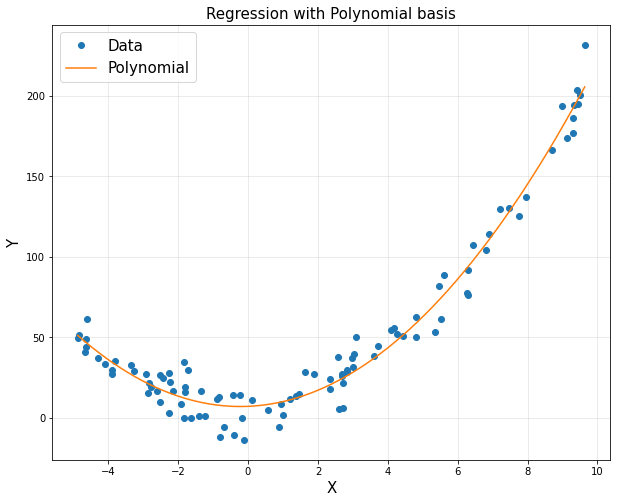

In [59]:
polybasis = np.hstack([xp**i for i in range(d)])
polybasis = np.asmatrix(polybasis)
yp = polybasis * theta

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'Polynomial')
plt.title('Regression with Polynomial basis', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)
plt.show()

## Nonlinear Regression with RBF Functions

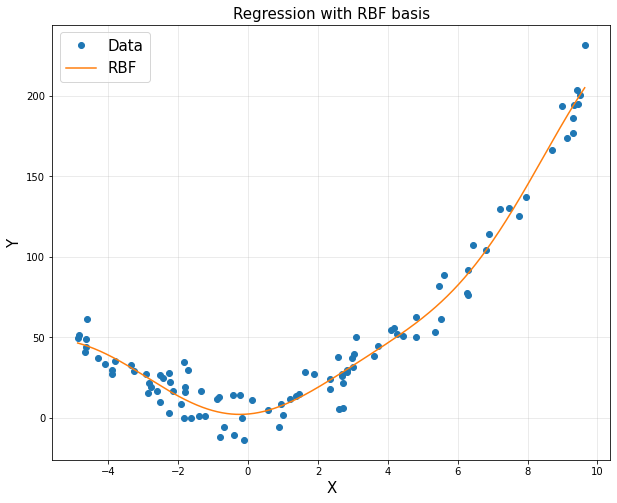

In [64]:
xp = np.arange(np.min(x), np.max(x), 0.01).reshape([-1, 1])

d = 6
u = np.linspace(np.min(x), np.max(x), d)
sigma = 4

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
A = np.asmatrix(A)

theta = (A.T@A).I@A.T@y

rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.asmatrix(rbfbasis)

yp = rbfbasis * theta

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'o', label = 'Data')
plt.plot(xp, yp, label = 'RBF')
plt.title('Regression with RBF basis', fontsize = 15)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)
plt.show()